In [ ]:
# 这是一个用来得到ec的精细话数据的脚本

# 数据类型
1. vis 
2. uv_10
3. tmax
4. tmin
5. tcc 
6. t2
7. skt
8. lsp(大尺度降水)
9. conv(对流降水)


In [2]:
import os
os.environ["HDF5_USE_FILE_LOCKING"] = 'FALSE'
import netCDF4 
import h5py     
# 测试数据的可用性
def read_data():
        file_path = "/home/liyuan3970/Data/My_Git/2022041700/"        
        file_name = file_path +"ecfine.I2022041700.000.F2022041700.nc"
        f = netCDF4.Dataset(file_name)
        data_xr_nc = f.variables['t']
        lat = f.variables['latP'][:]
        lon = f.variables['lonP'][:]
        time = f.variables['time'][:]
          
        # return lat,lon,time,data_xr_nc
read_data()


In [23]:
# 面向过程的编程
import xarray as xr
file_path = "/home/liyuan3970/Data/My_Git/2022041700/*.nc" 
f = xr.open_mfdataset(file_path, parallel=True)




# 数据的存储

In [90]:
# 单数据的完整存储
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
import xesmf as xe
import redis
import xarray as xr
file_path = "/home/liyuan3970/Data/My_Git/2022041700/*.nc" 
f = xr.open_mfdataset(file_path, parallel=True)

vis=f.vis.sel(lev=1000,lonS=slice(120,122),latS=slice(29,27.5))
vis =  vis.swap_dims({'latS':'lat','lonS':'lon'})
ds_out = xr.Dataset(
            {   
                
                "lat": (["lat"], np.arange(27.8, 29.5, 0.05)),
                "lon": (["lon"], np.arange(120, 122, 0.05)),
            }
        )
regridder = xe.Regridder(vis, ds_out, "bilinear")
# vis = vis.reset_coords(names=['time','lat','lon'], drop=True)
dr_out = regridder(vis)
# vis
data = dr_out.sel(lat = 28.5,lon = 121.5,method='nearest').to_pandas()
a = data.tolist()
a

/opt/conda/lib/python3.7/site-packages/dask/array/core.py:343: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


[nan,
 1750.00341796875,
 1814.71630859375,
 1748.47705078125,
 1679.7958984375,
 1674.606689453125,
 1583.64208984375,
 1584.863037109375,
 1623.93505859375,
 1710.626220703125,
 1709.405029296875,
 1677.96435546875,
 1591.2734375,
 1443.532470703125,
 1188.0380859375,
 1272.897705078125,
 1598.599365234375,
 1721.92041015625,
 1793.95947265625,
 1688.953369140625,
 1663.61767578125,
 1611.72509765625,
 1513.739990234375,
 1384.31396484375,
 1696.279296875,
 1798.5380859375,
 1605.6201171875,
 661.787109375,
 1363.251708984375,
 1668.806884765625,
 1205.132080078125,
 1086.695068359375,
 1397.744873046875,
 1645.302734375,
 1210.626708984375,
 911.176513671875,
 1521.37109375,
 1231.68896484375,
 1218.563232421875,
 571.43310546875,
 816.548828125,
 1220.39453125,
 871.1884765625,
 1196.890380859375,
 1402.93408203125,
 1447.1953125,
 962.45849609375,
 1122.104248046875,
 1070.822021484375,
 1434.68017578125,
 1093.41064453125,
 896.21923828125,
 266.48828125]

In [24]:
f

,Array,Chunk
Bytes,1.10 GB,20.81 MB
Shape,"(15, 53, 481, 721)","(15, 1, 481, 721)"
Count,281 Tasks,53 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.10 GB,20.81 MB
Shape,"(15, 53, 481, 721)","(15, 1, 481, 721)"
Count,281 Tasks,53 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [26]:
# 读取固定点的数据
#选择固定经纬度范围的数据
# sub=ff.sel(lon=slice(105,120),lat=slice(15,30))
vis=f.vis.sel(lev=1000,lonS=slice(120,122),latS=slice(29,27.5))
# vis=f.vis
# t =f.t
# t.sel(lev=1000,lonP=125,latP=27.5,method='nearest').data
vis


,Array,Chunk
Bytes,702.78 kB,13.26 kB
Shape,"(15, 53, 13, 17)","(15, 1, 13, 17)"
Count,334 Tasks,53 Chunks
Type,float32,numpy.ndarray


In [18]:
# 线性插值的核心
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp1d

x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,6,7,8,9,10] # 对应没每个点的值
f1=interp1d(x,y,kind='linear')#,kind='cubic'
f1=interp1d(x,y,kind='cubic')#,kind='cubic'
x_pre = [1.1,2.2,3.3,4.4,5.5,6.6,7.7,8.8,9.9]

y_pre = f1(x_pre)

y_pre


array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

In [21]:
# 数据结构的设计
data = {
    '淡竹':{
        'value1':[53],
        'value2':[53],
        'value3':[53]
    },
    '洪家':{
        'value1':[53],
        'value2':[53],
        'value3':[53]
    }
    }

In [35]:
import numpy as np
# for i in range(1,53*3,3):
#     print(i)

x_da = [x for x in range(1,53*3+1,3) ]
print(len(x_da))

53


# 核心代码

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
import xesmf as xe
import redis
import pandas as pd

class ec_data_point:
    def __init__(self, select_time,select_type,select_lat,select_lon): 
        # self.var_list = ['vis','u10','v10','tmax2','tmin2','tcc','t2','skt','lsp','cp']
        self.var_list = ['u10','v10','tcc','t2','skt','lsp','cp','tp','r']
        self.county_name = ['station1']
        self.county_lat = [29.0]
        self.county_lon = [121.2]
        self.data = { }
        self.read_data()
    def regrid_data(self,data):
        ds_out = xr.Dataset(
            {   
                
                "lat": (["lat"], np.arange(27.8, 29.5, 0.05)),
                "lon": (["lon"], np.arange(120, 122, 0.05)),
            }
        )
        regridder = xe.Regridder(data, ds_out, "bilinear")
        dr_out = regridder(data)
        return dr_out
    def read_data(self):
        file_path = "/home/liyuan3970/Data/My_Git/2022041700/*.nc" 
        f = xr.open_mfdataset(file_path, parallel=False)
        # 列表数据--
        
        u10 = f.u10.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8))
        u10 =  u10.swap_dims({'latS':'lat','lonS':'lon'})
        v10 = f.v10.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8))
        v10 =  v10.swap_dims({'latS':'lat','lonS':'lon'})
        tcc = f.tcc.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8))
        tcc =  tcc.swap_dims({'latS':'lat','lonS':'lon'})
        t2 = f.t2.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8))
        t2 =  t2.swap_dims({'latS':'lat','lonS':'lon'})
        skt = f.skt.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8))
        skt =  skt.swap_dims({'latS':'lat','lonS':'lon'})
        lsp = f.lsp.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8))
        lsp =  lsp.swap_dims({'latS':'lat','lonS':'lon'})
        cp = f.cp.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8)) 
        cp =  cp.swap_dims({'latS':'lat','lonS':'lon'})    
        tp = f.tp.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8)) 
        tp =  tp.swap_dims({'latS':'lat','lonS':'lon'}) 
        r = f.r.sel(lev=1000,lonP=slice(120,122),latP=slice(29.5,27.8)) # ！！！如果经纬度放大就会报错。。。
        r =  r.swap_dims({'latP':'lat','lonP':'lon'})
        r['lon'] = r['lonP']
        r['lat'] = r['latP']  
        # print(tp,r)
        # 空间插值----------------------------------
        # ----------------------------------------
        # ----------------------------------------
        # 此处为空间插值函数0.05
        grid_u10 = self.regrid_data(u10)
        grid_v10 = self.regrid_data(v10)
        grid_tcc = self.regrid_data(tcc)
        grid_t2 = self.regrid_data(t2)
        grid_skt = self.regrid_data(skt)
        grid_lsp = self.regrid_data(lsp)
        grid_cp = self.regrid_data(cp)
        grid_tp = self.regrid_data(tp)
        grid_r = r#self.regrid_data(r)
        # 数据的重新加载
        
        self.data['u10'] = grid_u10
        self.data['v10'] = grid_v10
        self.data['tcc'] = grid_tcc
        self.data['t2'] = grid_t2
        self.data['skt'] = grid_skt
        self.data['lsp'] = grid_lsp
        self.data['cp'] = grid_cp    
        self.data['tp'] = grid_tp 
        self.data['r'] = grid_r 
        # print(grid_vis.sel(lon=121.5, lat=28.5,method='nearest'))  
    def get_data(self):
        # get_point_data ={
        #     'station1':{
        #         'vis':vis
        #     }
        # }
        get_point_data ={}
        for i in range(len(self.county_lat)):
            get_point_data[str(self.county_name[i])] = {}
            for var in self.var_list:
                select_data = self.data[var]
                # 就近读取数据
                selelct_point_data =  select_data.sel(lon=self.county_lon[i], lat=self.county_lat[i],method='nearest')
                # 时间插值
                self.interp1d_data(selelct_point_data)
                get_point_data[str(self.county_name[i])][var] = selelct_point_data
        return get_point_data                     
    def get_single(self,select_lat,select_lon):
        '''用于处理特定经纬度数据'''
        # single_point_data = {
        #     'vis':vis
        # }
        single_point_data = {}
        single_point_inter1d_data = {}
        for var in self.var_list:
            print(var)
            select_data = self.data[var]
            single_point_data[var] = select_data.sel(lon=select_lon, lat=select_lat,method='nearest').to_pandas()
            single_point_inter1d_data[var] = self.interp1d_data(single_point_data[var])
        return single_point_inter1d_data                
    def interp1d_data(self,data):
        ''' 将get_data和get_single_data的数据进行时间插值'''
        date = data.index.tolist()
        value = data.tolist()
        d = pd.DataFrame()
        d['date'] = pd.to_datetime(date)
        d['val'] = value
        helper = pd.DataFrame({'date': pd.date_range(d['date'].min(), d['date'].max(), freq='H')})
        d = pd.merge(helper, d, on='date', how='left').sort_values('date')
        d['val'] = d['val'].interpolate(method='linear')        
        return d['val'].tolist() 
    def decode_latlon(self):
        pass
    def puton_redis(self):
        host = '192.168.192.5' # redis服务地址
        port = 6379  # redis服务端口
        # 连接数据库
        r = redis.StrictRedis(host=host,port=port, password="lq9394",db=0)
        value = str(self.data)
        name = 'EC_data'
        # ex - 过期时间（秒）
        # px - 过期时间（毫秒）
        # nx - 如果设置为True，则只有name不存在时，当前set操作才执行
        # xx - 如果设置为True，则只有name存在时，当前set操作才执行
        r.set(name, value, ex=60*60*24, px=None, nx=False, xx=False)

        

        

select_time,select_type,select_lat,select_lon = '2022041700','t',27.5,125.7
ec_worker = ec_data_point(select_time,select_type,select_lat,select_lon)       
# regrid_data = ec_worker.regrid_data()
# read_data = ec_worker.read_data()


/opt/conda/lib/python3.7/site-packages/dask/array/core.py:343: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


In [4]:
data = ec_worker.get_single(28.5,121.5)

u10
v10
tcc
t2
skt
lsp
cp
tp
r


In [5]:
data['r']

[75.39230346679688,
 70.74827829996745,
 66.10425313313802,
 61.460227966308594,
 58.288326263427734,
 55.116424560546875,
 51.944522857666016,
 53.22622299194336,
 54.5079231262207,
 55.78962326049805,
 56.816202799479164,
 57.84278233846029,
 58.869361877441406,
 59.03964487711588,
 59.20992787679037,
 59.380210876464844,
 60.053409576416016,
 60.72660827636719,
 61.39980697631836,
 62.162723541259766,
 62.92564010620117,
 63.68855667114258,
 65.38833363850911,
 67.08811060587566,
 68.78788757324219,
 67.21872202555339,
 65.64955647786458,
 64.08039093017578,
 63.20822397867838,
 62.33605702718099,
 61.463890075683594,
 62.70286560058594,
 63.94184112548828,
 65.18081665039062,
 65.60316975911458,
 66.02552286783855,
 66.4478759765625,
 67.96577453613281,
 69.48367309570312,
 71.00157165527344,
 71.51181030273438,
 72.02204895019531,
 72.53228759765625,
 72.66839090983073,
 72.8044942220052,
 72.94059753417969,
 73.17801666259766,
 73.41543579101562,
 73.6528549194336,
 69.4037144978

In [53]:
# 对2d数据进行处理
import xesmf as xe
import numpy as np
import xarray as xr

file_path = "/home/liyuan3970/Data/My_Git/2022041700/*.nc" 
f = xr.open_mfdataset(file_path, parallel=False)
# 列表数据--

tp = f.tp.sel(lev=1000,lonS=slice(120,122),latS=slice(29.5,27.8)) 
tp =  tp.swap_dims({'latS':'lat','lonS':'lon'})

r = f.r.sel(lev=1000,lonP=slice(115,126),latP=slice(34.5,24)) 
r =  r.swap_dims({'latP':'lat','lonP':'lon'})
data = r 
ds_out = xr.Dataset(
    {   
                
        "lat": (["lat"], np.arange(27.8, 29.5, 0.05)),
        "lon": (["lon"], np.arange(120, 122, 0.05)),
    }
)
# regridder = xe.Regridder(data, ds_out, "bilinear")
# dr_out = regridder(data)


tp


,Array,Chunk
Bytes,50.46 kB,952 B
Shape,"(53, 14, 17)","(1, 14, 17)"
Count,334 Tasks,53 Chunks
Type,float32,numpy.ndarray


In [23]:
tp.cf

Coordinates:
- CF Axes:   X, Y, Z, T: n/a

- CF Coordinates:   longitude: ['lonS']
                    latitude: ['latS']
                    vertical: ['lev']
                    time: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

In [54]:
r['lon'] = r['lonP']
r['lat'] = r['latP']

In [55]:

regridder = xe.Regridder(r, ds_out, "bilinear")

/opt/conda/lib/python3.7/site-packages/dask/array/core.py:343: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


In [56]:
dr_out = regridder(r)

In [57]:
dr_out

,Array,Chunk
Bytes,288.32 kB,5.44 kB
Shape,"(53, 34, 40)","(1, 34, 40)"
Count,336 Tasks,53 Chunks
Type,float32,numpy.ndarray


# 时间插值

In [60]:
data = ec_worker.get_single(28.5,121.5)

u10
v10
tcc
t2
skt
lsp
cp
tp
r


In [21]:
data

{'vis': [nan,
  nan,
  nan,
  1750.00341796875,
  1771.5743815104167,
  1793.1453450520833,
  1814.71630859375,
  1792.6365559895833,
  1770.5568033854167,
  1748.47705078125,
  1725.5833333333333,
  1702.6896158854167,
  1679.7958984375,
  1678.066162109375,
  1676.33642578125,
  1674.606689453125,
  1644.28515625,
  1613.963623046875,
  1583.64208984375,
  1584.049072265625,
  1584.4560546875,
  1584.863037109375,
  1597.8870442708333,
  1610.9110514322917,
  1623.93505859375,
  1652.8321126302083,
  1681.7291666666667,
  1710.626220703125,
  1710.2191569010417,
  1709.8120930989583,
  1709.405029296875,
  1698.9248046875,
  1688.444580078125,
  1677.96435546875,
  1649.0673828125,
  1620.17041015625,
  1591.2734375,
  1542.0264485677083,
  1492.7794596354167,
  1443.532470703125,
  1358.36767578125,
  1273.202880859375,
  1188.0380859375,
  1216.3246256510417,
  1244.6111653645833,
  1272.897705078125,
  1381.4649251302083,
  1490.0321451822917,
  1598.599365234375,
  1639.706380208

In [14]:
import pandas as pd
data_vis = data['tmax2']
date = data_vis.index.tolist()
value = data_vis.tolist()

d = pd.DataFrame()
d['date'] = pd.to_datetime(date)
d['val'] = value
d.to_csv('tmax2_orign.csv')

In [15]:
import pandas as pd
data_vis = data['tmax2']
date = data_vis.index.tolist()
value = data_vis.tolist()

d = pd.DataFrame()
d['date'] = pd.to_datetime(date)
d['val'] = value
# helper = pd.DataFrame({'date': pd.date_range(d['date'].min(), d['date'].max())})
helper = pd.DataFrame({'date': pd.date_range(d['date'].min(), d['date'].max(), freq='H')})
# helper
d = pd.merge(helper, d, on='date', how='left').sort_values('date')
# d['val'].interpolate(method='linear')
d['val'] = d['val'].interpolate(method='linear')
d.to_csv('tmax2_interplot.csv')

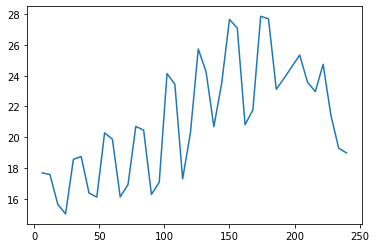

In [8]:

d['val'].plot()


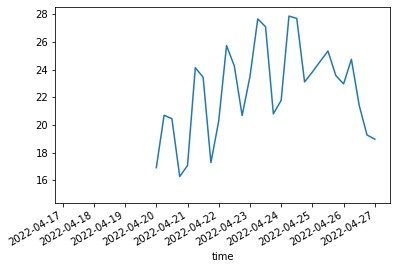

In [12]:
data['tmax2'].plot()